## Capstone Project

## Project: Distracted Driver Detection

---

In this project, I am going to attempt the solution for the [Distracted Driver Detection Challenge](https://www.kaggle.com/c/state-farm-distracted-driver-detection) presented by the State Farm on the Kaggle.


---
### Why We're Here 

In this project, we will implement an algorithm that could be used to detect the behavior of the driver based on the images provided by the dashboard camera of the Car.  At the end of this project, our code will accept the test-images provided by the State Farm and after analyzing the mage, it will predict the probability of various behaviors that driver in the image is engaged in. For example the program will predict that a driver in the image is enagaged in safe driving with probability of 0.5,  talking to passenger with a probility of 0.3 etc...

![Sample Image](Data/imgs/train/c0/img_2093.jpg)


### The Road Ahead

We break the notebook into separate steps.  Feel free to use the links below to navigate the notebook.

* [Step 1](#step1): Defining the Project
* [Step 2](#step2): Analysis
* [Step 3](#step3): Methodology
* [Step 4](#step4): Use a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 5](#step5): Create a CNN to Classify Dog Breeds (using Transfer Learning)
* [Step 6](#step6): Write your Algorithm
* [Step 7](#step7): Test Your Algorithm

---
<a id='step1'></a>
## Step 1: Defintion 

### Project Overview
According to the CDC motor vehicle safety division, one in five car accidents is caused by a distracted driver. Sadly, this translates to 425,000 people injured and 3,000 people killed by distracted driving every year. 

State Farm hopes to improve these alarming statistics, and better insure their customers, by testing whether dashboard cameras can automatically detect drivers engaging in distracted behaviors.

This Project aims to implement a model which will help in predicting the behavior of the driver. 

### Problem Statement
Given a dataset of 2D dashboard camera images, our aim is to classify the behavior of the driver in the image and predict whether they are driving attentively, wearing their seatbelt, taking a selfie with their friends in the backseat, or involved in any other distracted behavior. This program can be used to alert the drivers whenever they are getting engaged into any distraction while driving.

### Metrics
Submissions are evaluated using the multi-class logarithmic loss. Each image has been labeled with one true class. For each image, you must submit a set of predicted probabilities (one for every image). The formula is then,

![Sample Image](EvaluationMetricsFormula.png)

where N is the number of images in the test set, M is the number of image class labels,  log is the natural logarithm, yij is 1 if observation i belongs to class j and 0 otherwise, and pij is the predicted probability that observation i belongs to class j.


<a id='step2'></a>
## Step 2: Analysis
In this section, we will use the provided data for the purpose of analysing it. 
This will help us in deteremining which Machine/Deep learning algorithm may be a right choice to solve this problem.

### Data Exploration

#### Import Image Dataset

In the code cell below, we import a dataset of driver images.  We populate a few variables through the use of the `load_files` function from the scikit-learn library:
- `train_files`, `valid_files`, `test_files` - numpy arrays containing file paths to images
- `train_targets`, `valid_targets`, `test_targets` - numpy arrays containing onehot-encoded classification labels 
- `driver_behaviors` - list of string-valued driver behavior names for translating labels

In [1]:
from sklearn.datasets import load_files  
from sklearn.model_selection import train_test_split
from tensorflow.python.keras.utils import np_utils
import numpy as np
from glob import glob
import pandas as pd

# define function to load train, test, and validation datasets
def load_dataset(path):
    data = load_files(path)
    driver_files = np.array(data['filenames'])
    driver_targets = np_utils.to_categorical(np.array(data['target']), 10)
    return driver_files, driver_targets

# load train, test, and validation datasets
driver_files, driver_targets = load_dataset('Data/imgs/train')

train_files, valid_files, train_targets , valid_targets = train_test_split(driver_files, driver_targets, test_size=0.20, random_state=42)

test_files = np.array(glob('Data/imgs/test/*.jpg'))
#test_files = np.load('Data/imgs/test')

# load list of dog names
driver_behaviors = [item[20:-1] for item in sorted(glob('Data/imgs/train/*/'))]



#### Data Statistics

In the code cell below we will take a look at the statistics about the dataset and the driver data(Id) provided for the images.

In [2]:

# print statistics about the dataset
print("statistics about the dataset")
print('Total driver behavior categories : %d' % len(driver_behaviors))
print('Total driver images              : %s' % len(np.hstack([train_files, valid_files, test_files])))
print('Driver images for training       : %d' % len(train_files))
print('Driver images for validation     : %d' % len(valid_files))
print('Driver images for testing        : %d \n \n'% len(test_files))

print("Data loaded from the driver_imgs_list file \n")
driver_data = pd.read_csv("Data/driver_imgs_list.csv",header='infer')
print(driver_data.iloc[:,1].describe())
print("\nCat. Counts")
print(driver_data['classname'].value_counts(sort=True))

statistics about the dataset
Total driver behavior categories : 10
Total driver images              : 102150
Driver images for training       : 17939
Driver images for validation     : 4485
Driver images for testing        : 79726 
 

Data loaded from the driver_imgs_list file 

count     22424
unique       10
top          c0
freq       2489
Name: classname, dtype: object

Cat. Counts
c0    2489
c3    2346
c4    2326
c6    2325
c2    2317
c5    2312
c1    2267
c9    2129
c7    2002
c8    1911
Name: classname, dtype: int64


### Exploratory Visualization

In the code cell below we will present our data in form of visuals to give a better undesrtanding of it.

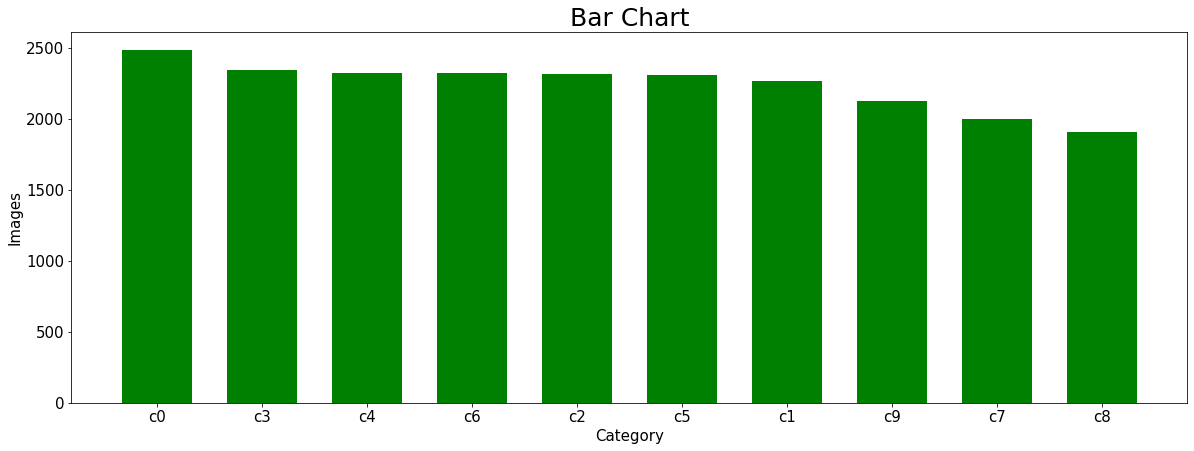

In [3]:
import matplotlib.pyplot as plt

%matplotlib inline

classes = driver_data['classname'].value_counts(sort=True)
labels = classes.index.tolist()
y = np.array(classes)
width = 1/1.5
N = len(y)
x = range(N)

fig = plt.figure(figsize=(20,15))
ay = fig.add_subplot(211)

plt.xticks(x, labels, size=15)
plt.yticks(size=15)

ay.bar(x, y, width, color="green")

plt.title('Bar Chart',size=25)
plt.xlabel('Category',size=15)
plt.ylabel('Images',size=15)

plt.show()

### Algorithms and Techniques

After analyzing the data and based on my learning from one of the earlier project about identifying the breed of the dog from the image, I believe that a CNN algorithm can help us get the good results for this problem.  We can also try to use the reansfer learning technique to our model. 

### Benchmark

For Benchmarking, our model can be compared against the top model from the [Public Leaderboard](https://www.kaggle.com/c/state-farm-distracted-driver-detection/leaderboard) for this competition. Our goal for this project would be to get into top top 50% of the public leaderboard.

<a id='step3'></a>
## Step 3: Methodology

In this section, we will pre-process the data for implementing the solution. Then we will develop our model.
Based on the results we may optimize the algorithm and fine tune the model to achieve expected results

### Pre-process the Data

When using TensorFlow as backend, Keras CNNs require a 4D array (which we'll also refer to as a 4D tensor) as input, with shape

$$
(\text{nb_samples}, \text{rows}, \text{columns}, \text{channels}),
$$

where `nb_samples` corresponds to the total number of images (or samples), and `rows`, `columns`, and `channels` correspond to the number of rows, columns, and channels for each image, respectively.  

The `path_to_tensor` function below takes a string-valued file path to a color image as input and returns a 4D tensor suitable for supplying to a Keras CNN.  The function first loads the image and resizes it to a square image that is $224 \times 224$ pixels.  Next, the image is converted to an array, which is then resized to a 4D tensor.  In this case, since we are working with color images, each image has three channels.  Likewise, since we are processing a single image (or sample), the returned tensor will always have shape

$$
(1, 224, 224, 3).
$$

The `paths_to_tensor` function takes a numpy array of string-valued image paths as input and returns a 4D tensor with shape 

$$
(\text{nb_samples}, 224, 224, 3).
$$

Here, `nb_samples` is the number of samples, or number of images, in the supplied array of image paths.  It is best to think of `nb_samples` as the number of 3D tensors (where each 3D tensor corresponds to a different image) in your dataset!

In [4]:
from tensorflow.python.keras.preprocessing import image                  
from tqdm import tqdm

def path_to_tensor(img_path):
    # loads RGB image as PIL.Image.Image type
    img = image.load_img(img_path, target_size=(224, 224))
    # convert PIL.Image.Image type to 3D tensor with shape (224, 224, 3)
    x = image.img_to_array(img)
    # convert 3D tensor to 4D tensor with shape (1, 224, 224, 3) and return 4D tensor
    return np.expand_dims(x, axis=0)

def paths_to_tensor(img_paths):
    list_of_tensors = [path_to_tensor(img_path) for img_path in tqdm(img_paths)]
    return np.vstack(list_of_tensors)

In the code cell below We will rescale the images by dividing every pixel in every image by 255.

In [5]:
from PIL import ImageFile                            
ImageFile.LOAD_TRUNCATED_IMAGES = True                 

# pre-process the data for Keras
train_tensors = paths_to_tensor(train_files).astype('float32')/255
valid_tensors = paths_to_tensor(valid_files).astype('float32')/255
#test_tensors = paths_to_tensor(test_files).astype('float32')/255

100%|██████████| 4485/4485 [00:21<00:00, 205.16it/s]



### Create a CNN to predict the behavior of the driver (from Scratch)

In this step, we will create a CNN that predict the behavior of the dog.  



To architect a CNN model for image classification generally 3 basic steps are required - which is Convolution(creating or adding convolution layer to extract features from the input image), Pooling(performed to reduce the dimensionality of each feature map) and finally comes flattening to convert the matrix into a linear array for the purpose of feeding it as a input to the nodes of neural network.


In [6]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.layers import Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()

### TODO: Define your architecture.
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(GlobalAveragePooling2D())
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
global_average_pooling2d (Gl (None, 64)               

### Compile the Model

In [7]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

In the code cell below, we will train our model using model checkpointing to save the model that attains the best validation loss.


In [8]:
from tensorflow.python.keras.callbacks import ModelCheckpoint  

epochs = 40

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.from_scratch.hdf5', 
                               verbose=1, save_best_only=True)

model.fit(train_tensors, train_targets, 
          validation_data=(valid_tensors, valid_targets),
          epochs=epochs, batch_size=30, callbacks=[checkpointer], verbose=1)

Train on 17939 samples, validate on 4485 samples
Epoch 1/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.3002 - accuracy: 0.1084
Epoch 00001: val_loss improved from inf to 2.29567, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 256s 14ms/sample - loss: 2.3002 - accuracy: 0.1083 - val_loss: 2.2957 - val_accuracy: 0.1173
Epoch 2/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.2902 - accuracy: 0.1251
Epoch 00002: val_loss improved from 2.29567 to 2.29045, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 251s 14ms/sample - loss: 2.2902 - accuracy: 0.1251 - val_loss: 2.2904 - val_accuracy: 0.1159
Epoch 3/40
17910/17939 [============================>.] - ETA: 0s - loss: 2.2631 - accuracy: 0.1487
Epoch 00003: val_loss improved from 2.29045 to 2.23735, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============

17910/17939 [============================>.] - ETA: 0s - loss: 1.7393 - accuracy: 0.3817
Epoch 00025: val_loss improved from 1.72923 to 1.70153, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 240s 13ms/sample - loss: 1.7392 - accuracy: 0.3820 - val_loss: 1.7015 - val_accuracy: 0.3891
Epoch 26/40
17910/17939 [============================>.] - ETA: 0s - loss: 1.7220 - accuracy: 0.3927
Epoch 00026: val_loss improved from 1.70153 to 1.67822, saving model to saved_models/weights.best.from_scratch.hdf5
17939/17939 [==============================] - 242s 13ms/sample - loss: 1.7219 - accuracy: 0.3927 - val_loss: 1.6782 - val_accuracy: 0.3960
Epoch 27/40
17910/17939 [============================>.] - ETA: 0s - loss: 1.7033 - accuracy: 0.3974
Epoch 00027: val_loss did not improve from 1.67822
17939/17939 [==============================] - 241s 13ms/sample - loss: 1.7032 - accuracy: 0.3975 - val_loss: 1.7946 - val_accuracy: 0.3588
Epoch 

### Load the Model with the Best Validation Loss

In [9]:
model.load_weights('saved_models/weights.best.from_scratch.hdf5')

### Test the Model

Try out your model on the test dataset of driver images.

In [10]:
# get index of predicted behavior of the driver for each image in test set
driver_behavior_predictions = [model.predict(path_to_tensor(file).astype('float32')/255)[0] for file in tqdm(test_files)]


100%|██████████| 79726/79726 [12:01:01<00:00,  1.84it/s]   


In [12]:
test_files_names = [item_name[15:] for item_name in test_files]

predictions = np.column_stack((np.asarray(test_files_names), np.asarray(driver_behavior_predictions,dtype=np.float32)))

print(predictions[:20])

[['img_1.jpg' '0.12036999' '0.0080436645' '0.038045265' '0.23675506'
  '0.3579467' '0.14033023' '0.015326636' '0.0012173854' '0.02114746'
  '0.060817584']
 ['img_10.jpg' '0.006852918' '0.0003132306' '0.0037758218' '0.0029838588'
  '0.0046329843' '0.9701248' '0.0005115634' '0.00042489805'
  '0.0038568457' '0.006523102']
 ['img_100.jpg' '0.13204066' '0.4372157' '0.0059085647' '0.3775514'
  '0.01946459' '7.188418e-06' '0.0053602485' '0.0066237403'
  '0.0036380214' '0.012189992']
 ['img_1000.jpg' '0.00010347318' '0.01112779' '0.06258317'
  '0.00056972867' '0.004542546' '3.5768908e-06' '0.39755595' '0.3114487'
  '0.20897835' '0.003086746']
 ['img_100000.jpg' '0.17994824' '0.10149346' '0.044742446' '0.21396816'
  '0.19560243' '0.0036444897' '0.09709423' '0.0042235875' '0.037677776'
  '0.121605195']
 ['img_100001.jpg' '0.30507848' '0.013072746' '8.603278e-08' '0.5503513'
  '0.0052097766' '0.00029380157' '6.283507e-05' '0.00070912205'
  '1.1794362e-05' '0.12520993']
 ['img_100002.jpg' '0.00216

In [15]:
np.savetxt('Submissions/submission1.csv',predictions, delimiter=',', comments='',  newline='\n', fmt='%s', header = 'img,c0,c1,c2,c3,c4,c5,c6,c7,c8,c9')

The first submission resulted in a public score of 1.96316 that would have ranked 1127 out of 1439 submissions on public leaderboard resulting in top 78%.

![Sample Image](Submissions/submission1.png)

---
<a id='step4'></a>
## Step 4: Use a CNN to Classify Dog Breeds

To reduce training time without sacrificing accuracy, we show you how to train a CNN using transfer learning.  In the following step, you will get a chance to use transfer learning to train your own CNN.

### Obtain Bottleneck Features

In [18]:
bottleneck_features = np.load('/data/bottleneck_features/DogVGG16Data.npz')
train_VGG16 = bottleneck_features['train']
valid_VGG16 = bottleneck_features['valid']
test_VGG16 = bottleneck_features['test']

### Model Architecture

The model uses the the pre-trained VGG-16 model as a fixed feature extractor, where the last convolutional output of VGG-16 is fed as input to our model.  We only add a global average pooling layer and a fully connected layer, where the latter contains one node for each dog category and is equipped with a softmax.

In [19]:
VGG16_model = Sequential()
VGG16_model.add(GlobalAveragePooling2D(input_shape=train_VGG16.shape[1:]))
VGG16_model.add(Dense(133, activation='softmax'))

VGG16_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_2 ( (None, 512)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 133)               68229     
Total params: 68,229
Trainable params: 68,229
Non-trainable params: 0
_________________________________________________________________


### Compile the Model

In [20]:
VGG16_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### Train the Model

In [21]:
checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.VGG16.hdf5', 
                               verbose=1, save_best_only=True)

VGG16_model.fit(train_VGG16, train_targets, 
          validation_data=(valid_VGG16, valid_targets),
          epochs=20, batch_size=20, callbacks=[checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 303us/step - loss: 12.5027 - acc: 0.1129 - val_loss: 10.9906 - val_acc: 0.2048
Epoch 2/20
6680/6680 [==============================] - 2s 253us/step - loss: 10.5072 - acc: 0.2557 - val_loss: 10.2964 - val_acc: 0.2539
Epoch 3/20
6680/6680 [==============================] - 2s 254us/step - loss: 9.8862 - acc: 0.3256 - val_loss: 9.8868 - val_acc: 0.3054
Epoch 4/20
6680/6680 [==============================] - 2s 255us/step - loss: 9.4793 - acc: 0.3647 - val_loss: 9.7399 - val_acc: 0.3234
Epoch 5/20
6680/6680 [==============================] - 2s 254us/step - loss: 9.3566 - acc: 0.3889 - val_loss: 9.6576 - val_acc: 0.3389
Epoch 6/20
6680/6680 [==============================] - 2s 256us/step - loss: 9.2726 - acc: 0.3994 - val_loss: 9.5918 - val_acc: 0.3401
Epoch 7/20
6680/6680 [==============================] - 2s 254us/step - loss: 9.1186 - acc: 0.4073 - val_loss: 9.5342 - val_acc: 0.35

### Load the Model with the Best Validation Loss

In [22]:
VGG16_model.load_weights('saved_models/weights.best.VGG16.hdf5')

### Test the Model

Now, we can use the CNN to test how well it identifies breed within our test dataset of dog images.  We print the test accuracy below.

In [23]:
# get index of predicted dog breed for each image in test set
VGG16_predictions = [np.argmax(VGG16_model.predict(np.expand_dims(feature, axis=0))) for feature in test_VGG16]

# report test accuracy
test_accuracy = 100*np.sum(np.array(VGG16_predictions)==np.argmax(test_targets, axis=1))/len(VGG16_predictions)
print('Test accuracy: %.4f%%' % test_accuracy)

Test accuracy: 43.3014%


### Predict Dog Breed with the Model

In [24]:
from extract_bottleneck_features import *

def VGG16_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_VGG16(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = VGG16_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step5'></a>
## Step 5: Create a CNN to Classify Dog Breeds (using Transfer Learning)

You will now use transfer learning to create a CNN that can identify dog breed from images.  Your CNN must attain at least 60% accuracy on the test set.

In Step 4, we used transfer learning to create a CNN using VGG-16 bottleneck features.  In this section, you must use the bottleneck features from a different pre-trained model.  To make things easier for you, we have pre-computed the features for all of the networks that are currently available in Keras.  These are already in the workspace, at /data/bottleneck_features.  If you wish to download them on a different machine, they can be found at:
- [VGG-19](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogVGG19Data.npz) bottleneck features
- [ResNet-50](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogResnet50Data.npz) bottleneck features
- [Inception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogInceptionV3Data.npz) bottleneck features
- [Xception](https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/DogXceptionData.npz) bottleneck features

The files are encoded as such:

    Dog{network}Data.npz
    
where `{network}`, in the above filename, can be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.  

The above architectures are downloaded and stored for you in the `/data/bottleneck_features/` folder.

This means the following will be in the `/data/bottleneck_features/` folder:

`DogVGG19Data.npz`
`DogResnet50Data.npz`
`DogInceptionV3Data.npz`
`DogXceptionData.npz`



### (IMPLEMENTATION) Obtain Bottleneck Features

In the code block below, extract the bottleneck features corresponding to the train, test, and validation sets by running the following:

    bottleneck_features = np.load('/data/bottleneck_features/Dog{network}Data.npz')
    train_{network} = bottleneck_features['train']
    valid_{network} = bottleneck_features['valid']
    test_{network} = bottleneck_features['test']

In [25]:
### TODO: Obtain bottleneck features from another pre-trained CNN.
bottleneck_features = np.load('/data/bottleneck_features/DogResnet50Data.npz')
train_Resnet50 = bottleneck_features['train']
valid_Resnet50 = bottleneck_features['valid']
test_Resnet50 = bottleneck_features['test']

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  At the end of your code cell block, summarize the layers of your model by executing the line:
    
        <your model's name>.summary()
   
__Question 5:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  Describe why you think the architecture is suitable for the current problem.

__Answer:__ 1. Picked the Resnet-50 model to use transfer learning for creating a CNN.
2. Downloaded the bottleneck features for Resnet-50 and stored them in bottleneck_features. These bottleneck features are fed as input to our neural network and helps in reducing the training time without compromising with the accuracy.
3. Since we're already using pre-trained model we don't need to add convolution layers for feature extraction. Last convolutional output of the Resnet-50 will be fed as input to our model. We only need to add the layer to layer for flattening and a fully connected layer.
4. This architecture is suitable for the current problem because the Resnet-50 is already trained on millions of images and have pre-trained weights so now in our case only the fully connected neural network needs to be trained. This will save great amount of training time and we won't have to worry about the decrease in accuracy too. This is evident from the increase in accuracy too where after implementation of transfer learning accuracy of the model increased hugely from 5.6% to almost 80%.


In [26]:
### TODO: Define your architecture.
Resnet50_model = Sequential()
Resnet50_model.add(GlobalAveragePooling2D(input_shape=train_Resnet50.shape[1:]))
Resnet50_model.add(Dense(133, activation='softmax'))

Resnet50_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
global_average_pooling2d_3 ( (None, 2048)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 133)               272517    
Total params: 272,517
Trainable params: 272,517
Non-trainable params: 0
_________________________________________________________________


### (IMPLEMENTATION) Compile the Model

In [27]:
### TODO: Compile the model.
Resnet50_model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

### (IMPLEMENTATION) Train the Model

Train your model in the code cell below.  Use model checkpointing to save the model that attains the best validation loss.  

You are welcome to [augment the training data](https://blog.keras.io/building-powerful-image-classification-models-using-very-little-data.html), but this is not a requirement. 

In [28]:
### TODO: Train the model.
Resnet50_checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.Resnet50.hdf5', 
                               verbose=1, save_best_only=True)

Resnet50_model.fit(train_Resnet50, train_targets, 
          validation_data=(valid_Resnet50, valid_targets),
          epochs=20, batch_size=20, callbacks=[Resnet50_checkpointer], verbose=1)

Train on 6680 samples, validate on 835 samples
Epoch 1/20
6680/6680 [==============================] - 2s 277us/step - loss: 1.5970 - acc: 0.6051 - val_loss: 0.7912 - val_acc: 0.7569
Epoch 2/20
6680/6680 [==============================] - 2s 230us/step - loss: 0.4363 - acc: 0.8650 - val_loss: 0.6455 - val_acc: 0.7904
Epoch 3/20
6680/6680 [==============================] - 2s 231us/step - loss: 0.2557 - acc: 0.9184 - val_loss: 0.6262 - val_acc: 0.8012
Epoch 4/20
6680/6680 [==============================] - 2s 228us/step - loss: 0.1768 - acc: 0.9415 - val_loss: 0.6496 - val_acc: 0.8204
Epoch 5/20
6680/6680 [==============================] - 2s 229us/step - loss: 0.1226 - acc: 0.9605 - val_loss: 0.6274 - val_acc: 0.8228
Epoch 6/20
6680/6680 [==============================] - 2s 228us/step - loss: 0.0890 - acc: 0.9722 - val_loss: 0.7325 - val_acc: 0.8096
Epoch 7/20
6680/6680 [==============================] - 2s 229us/step - loss: 0.0654 - acc: 0.9808 - val_loss: 0.6770 - val_acc: 0.8204
E

### (IMPLEMENTATION) Load the Model with the Best Validation Loss

In [29]:
### TODO: Load the model weights with the best validation loss.
Resnet50_model.load_weights('saved_models/weights.best.Resnet50.hdf5')

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images. Ensure that your test accuracy is greater than 60%.

In [30]:
### TODO: Calculate classification accuracy on the test dataset.
# get index of predicted dog breed for each image in test set
Resnet50_predictions = [np.argmax(Resnet50_model.predict(np.expand_dims(feature, axis=0))) for feature in test_Resnet50]

# report test accuracy
Resnet50_test_accuracy = 100*np.sum(np.array(Resnet50_predictions)==np.argmax(test_targets, axis=1))/len(Resnet50_predictions)
print('Test accuracy: %.4f%%' % Resnet50_test_accuracy)

Test accuracy: 79.3062%


### (IMPLEMENTATION) Predict Dog Breed with the Model

Write a function that takes an image path as input and returns the dog breed (`Affenpinscher`, `Afghan_hound`, etc) that is predicted by your model.  

Similar to the analogous function in Step 5, your function should have three steps:
1. Extract the bottleneck features corresponding to the chosen CNN model.
2. Supply the bottleneck features as input to the model to return the predicted vector.  Note that the argmax of this prediction vector gives the index of the predicted dog breed.
3. Use the `dog_names` array defined in Step 0 of this notebook to return the corresponding breed.

The functions to extract the bottleneck features can be found in `extract_bottleneck_features.py`, and they have been imported in an earlier code cell.  To obtain the bottleneck features corresponding to your chosen CNN architecture, you need to use the function

    extract_{network}
    
where `{network}`, in the above filename, should be one of `VGG19`, `Resnet50`, `InceptionV3`, or `Xception`.

In [31]:
### TODO: Write a function that takes a path to an image as input
### and returns the dog breed that is predicted by the model.
from extract_bottleneck_features import *

def Resnet50_predict_breed(img_path):
    # extract bottleneck features
    bottleneck_feature = extract_Resnet50(path_to_tensor(img_path))
    # obtain predicted vector
    predicted_vector = Resnet50_model.predict(bottleneck_feature)
    # return dog breed that is predicted by the model
    return dog_names[np.argmax(predicted_vector)]

---
<a id='step6'></a>
## Step 6: Write your Algorithm

Write an algorithm that accepts a file path to an image and first determines whether the image contains a human, dog, or neither.  Then,
- if a __dog__ is detected in the image, return the predicted breed.
- if a __human__ is detected in the image, return the resembling dog breed.
- if __neither__ is detected in the image, provide output that indicates an error.

You are welcome to write your own functions for detecting humans and dogs in images, but feel free to use the `face_detector` and `dog_detector` functions developed above.  You are __required__ to use your CNN from Step 5 to predict dog breed.  

Some sample output for our algorithm is provided below, but feel free to design your own user experience!

![Sample Human Output](images/sample_human_output.png)


### (IMPLEMENTATION) Write your Algorithm

In [47]:
### TODO: Write your algorithm.
### Feel free to use as many code cells as needed.

def DogBreedPredictor(img_path):
    # convert BGR image to RGB for plotting
    img = cv2.imread(img_path)
    cv_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.imshow(cv_rgb)
    plt.show()
    if dog_detector(img_path):
        print("Hello, Dog!!!")
        print("Your breed is ...")
        print(Resnet50_predict_breed(img_path))
        return
    elif face_detector(img_path):
        print("Hello, Human!!!")
        print("You look like a ...")
        print(Resnet50_predict_breed(img_path))
        return
    else :
        print("Whoa...you just discovered a new breed of dog.")
        return

---
<a id='step7'></a>
## Step 7: Test Your Algorithm

In this section, you will take your new algorithm for a spin!  What kind of dog does the algorithm think that __you__ look like?  If you have a dog, does it predict your dog's breed accurately?  If you have a cat, does it mistakenly think that your cat is a dog?

### (IMPLEMENTATION) Test Your Algorithm on Sample Images!

Test your algorithm at least six images on your computer.  Feel free to use any images you like.  Use at least two human and two dog images.  

__Question 6:__ Is the output better than you expected :) ?  Or worse :( ?  Provide at least three possible points of improvement for your algorithm.

__Answer:__ Output is as i expected. Algorithm worked perfectly on 6 out of 8 images. For rest of the 2 images it predicted the breed looks almost like the breed of the dog in image. To improve the algorithm we could have augment the data. Currently the algorithm assumes that it would see only one face/object per image. it would fail when an image is presented with multiple dogs of different breeds in same image. Another point of improvement can be based on our assumption in question 2 where we are asking the user to only provide the human images with a clear view of face. We can try to improve the algorithm so that it can identify the human even without clear view of face on it.

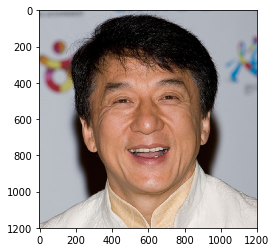

Hello, Human!!!
You look like a ...
in/127.Silky_terrier


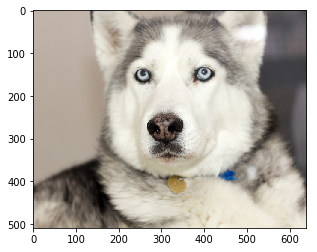

Hello, Dog!!!
Your breed is ...
in/005.Alaskan_malamute


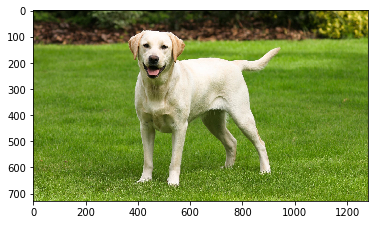

Hello, Dog!!!
Your breed is ...
in/096.Labrador_retriever


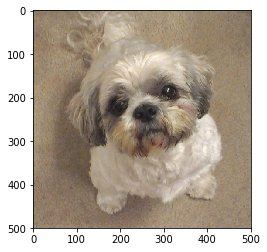

Hello, Dog!!!
Your breed is ...
in/099.Lhasa_apso


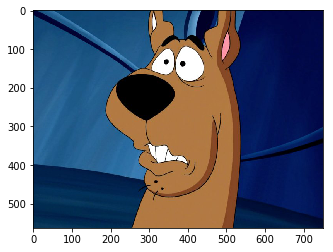

Whoa...you just discovered a new breed of dog.


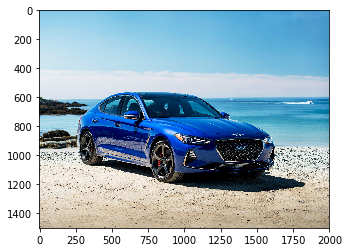

Whoa...you just discovered a new breed of dog.


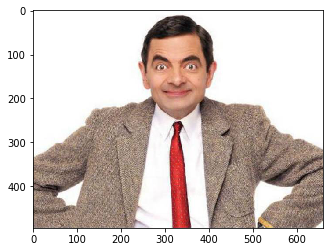

Hello, Human!!!
You look like a ...
in/132.Xoloitzcuintli


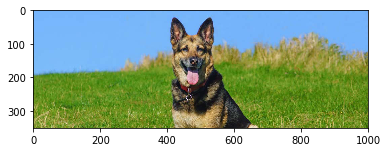

Hello, Dog!!!
Your breed is ...
in/022.Belgian_tervuren


In [52]:
import os
from pathlib import Path
## TODO: Execute your algorithm from Step 6 on
## at least 6 images on your computer.
## Feel free to use as many code cells as needed.
def TestDogBreedPredictorAlgorithm(path):
    for r, d, f in os.walk(path):
        for file in f:
            DogBreedPredictor(os.path.join(r, file))
        return  

path = 'DogBreedImages'
TestDogBreedPredictorAlgorithm(path)

# Please download your notebook to submit

In order to submit, please do the following:
1.  Download an HTML version of the notebook to your computer using 'File: Download as...'
2.  Click on the orange Jupyter circle on the top left of the workspace.
3.  Navigate into the dog-project folder to ensure that you are using the provided dog_images, lfw, and bottleneck_features folders; this means that those folders will *not* appear in the dog-project folder.  If they do appear because you downloaded them, delete them.
4.  While in the dog-project folder, upload the HTML version of this notebook you just downloaded.  The upload button is on the top right.
5.  Navigate back to the home folder by clicking on the two dots next to the folder icon, and then open up a terminal under the 'new' tab on the top right
6.  Zip the dog-project folder with the following command in the terminal:
 `zip -r dog-project.zip dog-project`
7.  Download the zip file by clicking on the square next to it and selecting 'download'.  This will be the zip file you turn in on the next node after this workspace!